C:\Users\MSI-PC\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


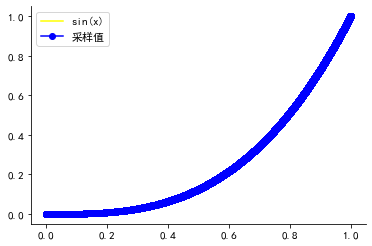

当采样次数为: 1000000,x.^3在[0,1]估计面积值为:  0.24987168919036473


In [3]:
import numpy as np
import math
def f(x): 
    return x**3
#times为采样次数
#bound为上下边界矩阵
def calro(times,a,b):
    #此为最简形式，基于正态分布于区间[a,b]内随机采数
    #后续添加基于样本，推测函数分布密度，决定该次采样是否接受，马尔卡尔蒙特卡洛方法
    x = []
    y = []
    for i in range(times):
        tp = np.random.rand()*(b-a)
        x.append(tp)
    x = np.sort(x)
    y = f(x)
    return np.array(x),np.array(y)
import matplotlib.pyplot as plt
SMALL_SIZE = 11
MEDIUM_SIZE = 13
BIGGER_SIZE = 13
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
times = 1000000
x_cal,y_cal = calro(times,0,1)
def plot_compare(times,x_cal,y_cal):
    #采样点是否合理直接决定估值精度
    x_real = np.linspace(0,1,times)
    y_real = f(x_real)
    plt.figure()
    gca = 'get_current_axis'
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    plt.plot(x_real,y_real,color='yellow',linestyle='-')
    #print(x_cal)
    plt.plot(x_cal,y_cal,color='blue',marker='o')
    plt.legend(['sin(x)','采样值'])
    plt.show()
plot_compare(times,x_cal,y_cal)
def cal_s(y_cal,times):
    return sum(y_cal)/times
print('当采样次数为: '+str(times)+',x.^3在[0,1]估计面积值为: ',cal_s(y_cal,times))

3.13644


C:\Users\MSI-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


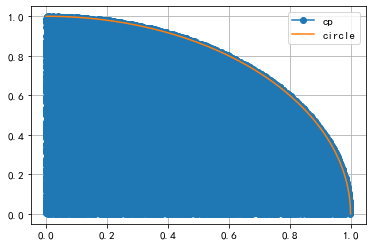

In [2]:
import math
class point:
    def __init__(self,x):
        self.x = x[0,0]
        self.y = x[0,1]
        self.distance = np.sqrt(self.x**2+self.y**2)
        
    
def calro_pi(times):
    points = []
    for i in range(times):
        tp = point(np.random.rand(1,2))
        points.append(tp)
    count = 0
    plot_x = []
    plot_y = []
    for x in points:
        if x.distance <=1:
            count+=1
            plot_x.append(x.x)
            plot_y.append(x.y)
    print(count/times*4)
    x = np.linspace(0,1,times/100)
    y = np.sqrt(1-x**2)
    plt.figure()
    plt.plot(np.array(plot_x),np.array(plot_y),marker='o',label='cp')
    plt.plot(x,y,label='circle')
    plt.legend()
    plt.grid()

calro_pi(100000)  